In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('datajm_2.csv')

In [3]:
#Linear Regression

In [4]:
x = data.iloc[:,1].values.reshape (-1,1)
y = data.iloc[:,2].values.reshape(-1,1)
X = data.iloc[:,0].values.reshape(-1,1)

In [5]:
y.shape

(81, 1)

In [6]:
x.shape

(81, 1)

Text(0, 0.5, '% Change in Production')

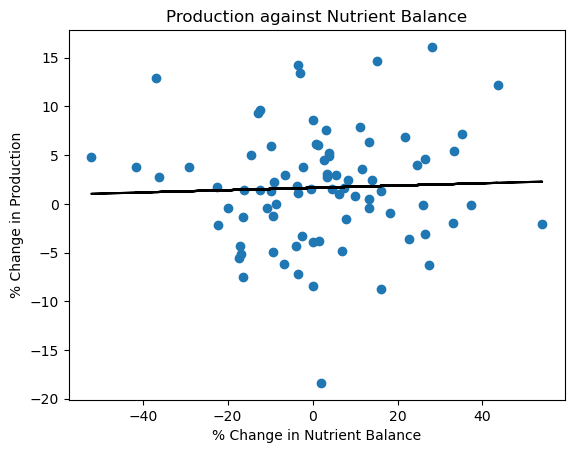

In [7]:
lm = linear_model.LinearRegression()
Model = lm.fit(x,y)
y_pred = lm.predict(x)
plt.scatter (x,y)
plt.plot(x, y_pred, color='black')
plt.title('Production against Nutrient Balance')
plt.xlabel('% Change in Nutrient Balance')
plt.ylabel('% Change in Production')

In [8]:
Model.intercept_

array([1.6474948])

In [9]:
Model.coef_

array([[0.01176621]])

In [10]:
Model.score(x,y)

0.0014696115110522934

Text(0, 0.5, '% Change in Production')

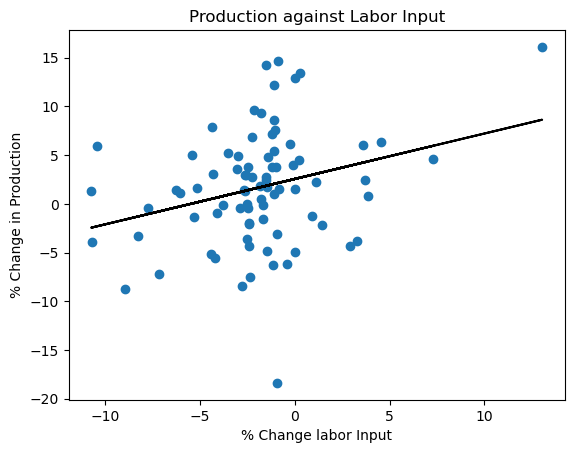

In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
y_pred = lm.predict(X)
plt.scatter (X,y)
plt.plot(X, y_pred, color='black')
plt.title('Production against Labor Input')
plt.xlabel('% Change labor Input')
plt.ylabel('% Change in Production')

In [12]:
model.coef_

array([[0.46665807]])

In [13]:
model.intercept_

array([2.55778306])

In [14]:
model.score(X,y)

0.08200840599813708

In [15]:
#GradientBoostRegressor GridSearchCV

In [16]:
p = data.iloc[:,:2].values
q = [-3.95961830e+00,  8.60373734e+00, -4.47907399e-01,  3.58584008e+00,
        1.59063259e+00,  4.47088495e+00, -4.57532118e-01, -3.62659680e+00,
       -3.25480912e+00,  5.91253818e+00,  1.35894626e+00, -3.80377988e+00,
        2.44050383e+00,  2.98401611e+00, -7.24761732e+00, -4.27216326e+00,
        9.30576287e+00,  2.80464702e+00, -1.83787154e+01,  1.61142157e+01,
        1.29505547e+01,  3.97249379e+00,  1.22011935e+01, -4.92229600e+00,
        1.51320092e+00,  5.40640557e-01,  1.46288189e+01,  1.14069231e+00,
       -8.43064404e+00, -5.60196564e+00,  5.46149851e+00,  1.00508700e+00,
        1.34723022e+01,  2.20510846e+00,  8.06235997e-01, -9.78601931e-01,
        7.61950385e+00,  6.13472634e+00,  1.45016808e+00,  7.90731058e+00,
       -1.26168650e+00, -4.86365791e+00, -6.11919237e+00,  1.42931884e+01,
       -2.11893856e+00, -8.76087478e+00,  6.39180936e+00,  1.46773056e+00,
        2.41875064e+00,  5.02956535e+00, -1.60899950e-01,  3.74655491e+00,
        6.06813899e+00,  4.60455568e+00, -5.15000000e+00,  3.09000000e+00,
       -1.33000000e+00,  5.21000000e+00,  4.91000000e+00,  2.98000000e+00,
       -1.00000000e-02,  1.83000000e+00, -1.50000000e+00,  1.78000000e+00,
        1.34000000e+00, -4.40000000e-01, -2.03000000e+00,  3.76000000e+00,
       -1.93000000e+00, -4.37000000e+00,  9.63000000e+00,  2.73000000e+00,
       -7.52000000e+00,  6.83000000e+00,  7.21000000e+00,  4.85000000e+00,
       -3.13000000e+00,  1.55000000e+00, -1.60000000e-01, -6.28000000e+00,
        3.78000000e+00]

In [17]:
print(np.shape(p))
print(np.shape(q))

(81, 2)
(81,)


In [18]:
p_train, p_test, q_train, q_test, = train_test_split(p,q, test_size =.3)

In [19]:
GBR = GradientBoostingRegressor()

In [20]:
  params = {'learning_rate': [0.01,0.02,0.03,0.04],
            'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [25, 75, 100],
                  'max_depth'    : [4,6,8,10]
                 }

In [21]:
GS = GridSearchCV(estimator=GBR, param_grid = params, cv = 2)

In [22]:
GS.fit(p_train, q_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [25, 75, 100],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [23]:

print(GS.best_estimator_)
print(GS.best_score_)
print(GS.best_params_)

GradientBoostingRegressor(learning_rate=0.02, max_depth=8, n_estimators=75,
                          subsample=0.1)
-0.0904079429290715
{'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 75, 'subsample': 0.1}


In [24]:
#XGBRegressor GrdSearchCV

In [25]:
parameters ={
'learning_rate': [0.001,0.01,0.1,1],
'n_estimators' : [100, 200, 500],
'max_depth'    : [3,6,9],
'gamma': [0.01,0.1]
}

In [26]:
XGB = XGBRegressor()

In [27]:
XGBRGS = GridSearchCV(estimator=XGB, param_grid = parameters, cv = 5, scoring="r2", refit="r2", verbose=4)

In [28]:
XGBRGS.fit(p_train,q_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=-0.161 total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=-0.035 total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=-0.033 total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=-0.154 total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=-0.705 total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200;, score=-0.238 total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200;, score=-0.074 total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200;, score=-0.057 total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [29]:
print(XGBRGS.best_score_)
print(XGBRGS.best_params_)
print(XGBRGS.best_estimator_)

-0.20909569730433558
{'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 100}
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
